In [186]:
#Dependencies

import requests
import json
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [187]:
# The path to our CSV file
#(name the file we are going to read as "file_gdp")
file_gdp = "suicides_vs_gdp_o.csv"

# Read Suicide Data our Kickstarter data into pandas 
#rename it as a dataframe(df) for ease of readibiity
su_vs_gdp_o_df = pd.read_csv(file_gdp)

# Display all columns 
su_vs_gdp_o_df.columns



Index(['index', 'country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'year_gdp', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [188]:
# Display information of the df
#su_vs_gdp_o_df.info()

In [189]:
# Group using 'country-year' column and using the aggregate command to define/combine data to respective column.
# for ease of readibility(also we are ommitting columns we do not need)
su_vs_gdp_df = su_vs_gdp_o_df.groupby('country-year').agg({'country':'first', 'year':'first', 
                                                           'suicides_no':'sum','population':'sum', 
                                                           'suicides/100k pop':'sum',
                                                           'year_gdp':'first',
                                                           'gdp_per_capita':'first'}).reset_index()



In [190]:
# Read/Create new df(all years, all suicide rates)
clean = "cleaned_su_vs_gdp.csv"

su_vs_gdp_c_df = pd.read_csv(clean)
su_vs_gdp_c_df.head()

,Unnamed: 0,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
0,0,Albania1987,Albania,1987,73,2709600,31.85,2.160000e+09,$796.00
1,1,Albania1988,Albania,1988,63,2764300,32.46,2.130000e+09,$769.00
2,2,Albania1989,Albania,1989,68,2803100,33.40,2.340000e+09,$833.00
3,3,Albania1992,Albania,1992,47,2822500,18.00,7.090000e+08,$251.00
4,4,Albania1993,Albania,1993,73,2807300,32.56,1.230000e+09,$437.00


In [191]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest gdp
sort_gdp_df = su_vs_gdp_df.sort_values(["year_gdp"], ascending=False)

# Filter the data so that only those in 2005 are in a DataFrame and save as new dataframe(df)
gdp_2005_df = sort_gdp_df.query("year == '2005'")

                                
# Us_2005 = gdp_2005_df.loc[gdp_2005_df['country']=='United States']
# Japan_2005 = gdp_2005_df.loc[gdp_2005_df['country']=='Japan']
# Germany_2005 = gdp_2005_df.loc[gdp_2005_df['country']=='Germany']
# United_Kingdom_2005 = gdp_2005_df.loc[gdp_2005_df['country']=='United Kingdom']
# Italy_2005 = gdp_2005_df.loc[gdp_2005_df['country']=='Italy']
# Brazil_2005 = gdp_2005_df.loc[gdp_2005_df['country']=='Brazil']

#Create new dataframe(df) to hold top x countries with highest year_gdp
gdp_2005_df = gdp_2005_df
gdp_2005_df.head(6)

# Create an array that contains the number of users each language has
country2005= gdp_2005_df.head(6)['country']
suicides2005=gdp_2005_df.head(6)['suicides/100k pop']
gdp_2005_df_top_6= gdp_2005_df.head(6)

gdp_2005_df_top_6

,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
2260,United States2005,United States,2005,32629,276106680,146.68,1.310000e+13,"$47,423.00"
1135,Japan2005,Japan,2005,30369,120657507,266.89,4.760000e+12,"$39,412.00"
825,Germany2005,Germany,2005,10270,78851254,161.49,2.860000e+12,"$36,289.00"
2229,United Kingdom2005,United Kingdom,2005,4047,56809024,79.16,2.520000e+12,"$44,372.00"
778,France2005,France,2005,10713,57160687,232.09,2.200000e+12,"$38,420.00"
1087,Italy2005,Italy,2005,3742,55244690,82.59,1.850000e+12,"$33,536.00"


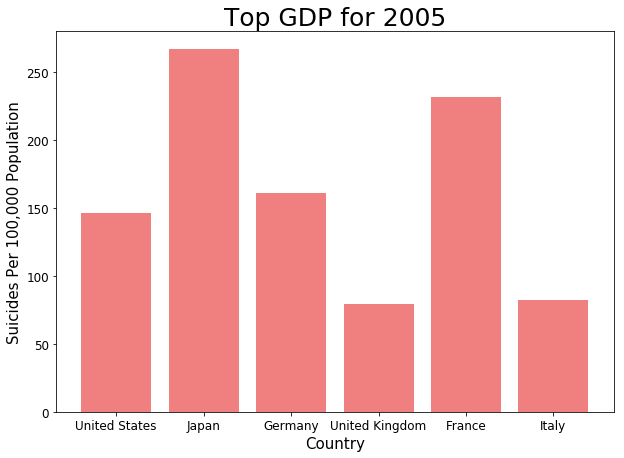

In [192]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest gdp
sort_gdp_df = su_vs_gdp_df.sort_values(["year_gdp"], ascending=False)

# Filter the data so that only those in 2015 are in a DataFrame and save as new dataframe(df)
gdp_2005_df = sort_gdp_df.query("year == '2005'")
gdp_2005_df.head(6)

#Create new dataframe(df) to hold top x countries with highest year_gdp
gdp_2005_df_top_6 = gdp_2005_df.head(6)
gdp_2005_df_top_6


# Create an array that contains the number of users each language has
country2= gdp_2005_df_top_6['country']
suicides2=gdp_2005_df_top_6['suicides/100k pop']

# Tell matplotlib where we would like to place each of our x axis headers
plt.figure(figsize=(10,7))
plt.bar(country2, suicides2, color="lightcoral", align="center")

# # Give the chart a title, x label, and y label
plt.title("Top GDP for 2005",fontsize=25)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Suicides Per 100,000 Population",fontsize=15)
plt.rcParams['font.size'] = 12.0

plt.savefig('top_gdp_2005.png')

##  Info  for "GDP for 2015"

In [193]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest gdp
sort_gdp_df = su_vs_gdp_df.sort_values(["year_gdp"], ascending=False)

# Filter the data so that only those in 2015 are in a DataFrame and save as new dataframe(df)
gdp_2015_df = sort_gdp_df.query("year == '2015'")
gdp_2015_df.head(6)

#Create new dataframe(df) to hold top x countries with highest year_gdp
gdp_2015_df_top_6 = gdp_2015_df.head(6)
gdp_2015_df_top_6

ind=('United States', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy')


# Create an array that contains the number of users each language has
country2015= gdp_2015_df_top_6['country'].tolist()
suicides2015=gdp_2015_df_top_6['suicides/100k pop'].tolist()
country2005= gdp_2005_df_top_6['country'].tolist()
suicides2005=gdp_2005_df_top_6['suicides/100k pop'].tolist()


In [194]:
gdp_2015_df_top_6

,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
2270,United States2015,United States,2015,44189,300078511,175.41,1.810000e+13,"$60,387.00"
1145,Japan2015,Japan,2015,23092,120376310,206.04,4.390000e+12,"$36,510.00"
835,Germany2015,Germany,2015,10088,78136683,150.34,3.380000e+12,"$43,201.00"
2239,United Kingdom2015,United Kingdom,2015,4910,61082942,86.74,2.890000e+12,"$47,240.00"
1097,Italy2015,Italy,2015,3988,58117697,78.45,1.830000e+12,"$31,537.00"
378,Brazil2015,Brazil,2015,11163,191087085,77.45,1.800000e+12,"$9,431.00"


## BAR CHART Top GDP for 2015

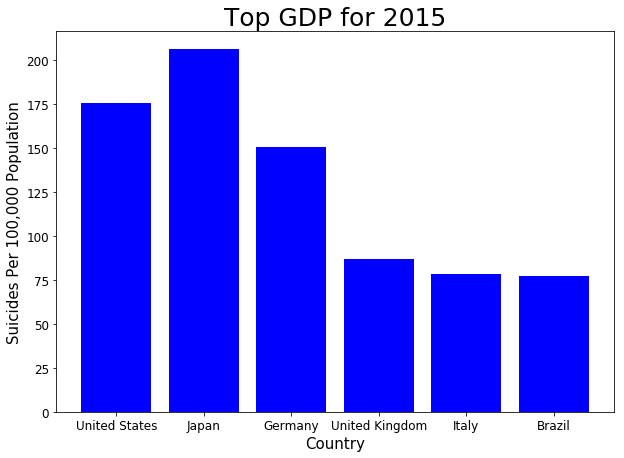

In [195]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest gdp
sort_gdp_df = su_vs_gdp_df.sort_values(["year_gdp"], ascending=False)

# Filter the data so that only those in 2015 are in a DataFrame and save as new dataframe(df)
gdp_2015_df = sort_gdp_df.query("year == '2015'")
gdp_2015_df.head(6)

#Create new dataframe(df) to hold top x countries with highest year_gdp
gdp_2015_df_top_6 = gdp_2015_df.head(6)
gdp_2015_df_top_6


# Create an array that contains the number of users each language has
country1= gdp_2015_df_top_6['country']
suicides1=gdp_2015_df_top_6['suicides/100k pop']

# Tell matplotlib where we would like to place each of our x axis headers
plt.figure(figsize=(10,7))
plt.bar(country1, suicides1, color="blue", align="center")

# # Give the chart a title, x label, and y label
plt.title("Top GDP for 2015",fontsize=25)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Suicides Per 100,000 Population",fontsize=15)
plt.rcParams['font.size'] = 12.0

plt.savefig('top_gdp_2015.png')


In [196]:
# Create new df for top 4 gdp countries and their suicide rates for comparison

sui_top4_2015 = suicides1.head(4)

sui_top4_2005 = suicides2.head(4)


## GDP 2015 vs 2005

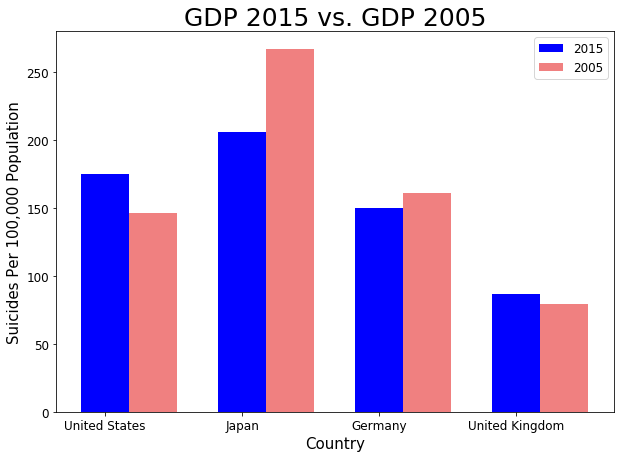

<Figure size 432x288 with 0 Axes>

In [199]:
# Create List
N = 4
suicides_2015 = (sui_top4_2015)

suicides_2005 = (sui_top4_2005)


# width = 0.35    

plt.figure(figsize=(10,7))
# plt.bar(ind, suicides2015, color="blue", align="center")
# plt.bar(ind + width, suicides2005, color="red", align="center")
# # # Give the chart a title,suicides2005 x label, and y label
plt.title("GDP 2015 vs. GDP 2005",fontsize=25)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Suicides Per 100,000 Population",fontsize=15)
# plt.rcParams['font.size'] = 12.0
plt.xticks(range(4),['United States', 'Japan', 'Germany', 'United Kingdom'])  

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, suicides_2015, width, color='blue', label='2015')
plt.bar(ind + width, suicides_2005, width, color='lightcoral',
    label='2005')


plt.legend(loc='best')
plt.show()

plt.savefig('GDP_2015_vs_2005.png')